# Genius Lyrics Sentiment Analysis

## Project Overview
Sentiment analysis and preprocessing of the Genius Lyrics dataset using a lexicon-based approach.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import nltk
import re

# Download necessary NLTK resources
nltk.download('punkt')        # Original tokenizer
nltk.download('punkt_tab')    # New Punkt sentence tokenizer data (required for newer NLTK versions)
nltk.download('stopwords')    # Stopwords
nltk.download('wordnet')      # WordNet lemmatizer

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to /home/deepak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/deepak/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/deepak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/deepak/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Data Loading and Initial Exploration Function
def load_and_explore_dataset(file_path):
    """
    Load Genius Lyrics dataset and perform initial exploration with 1000 rows limit
    
    Parameters:
    -----------
    file_path : str
        Path to the CSV file containing lyrics
    
    Returns:
    --------
    pandas.DataFrame
        Loaded and preprocessed dataset limited to 1000 rows
    """
    try:
        # Load the dataset and limit to 1000 rows
        df = pd.read_csv(file_path, encoding='utf-8').sample(n=1000, random_state=42)
        
        # Basic dataset information
        print("Dataset Information:")
        print(f"Total number of entries (limited): {len(df)}")
        
        # Language distribution
        print("\nLanguage Distribution:")
        print(df['language'].value_counts())
        
        # Genre distribution
        print("\nGenre Distribution:")
        print(df['tag'].value_counts().head())
        
        # Filter for English lyrics
        df_english = df[df['language'] == 'en'].copy()
        print(f"\nNumber of English lyrics: {len(df_english)}")
        
        return df_english
    
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

In [3]:
# Text Preprocessing Functions
def clean_lyrics(text):
    """
    Comprehensive text cleaning for lyrics
    
    Parameters:
    -----------
    text : str
        Input lyrics text
    
    Returns:
    --------
    str
        Cleaned lyrics
    """
    if not isinstance(text, str):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove brackets and content inside them (often used for song section labels)
    text = re.sub(r'\[.*?\]', '', text)
    
    # Remove special characters and extra whitespaces
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

def remove_stopwords(text):
    """
    Remove English stopwords from text
    
    Parameters:
    -----------
    text : str
        Input text
    
    Returns:
    --------
    str
        Text with stopwords removed
    """
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)

In [4]:
# Advanced Preprocessing and Analysis Functions
def preprocess_lyrics_dataset(df):
    """
    Apply comprehensive preprocessing to lyrics dataset
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe with lyrics
    
    Returns:
    --------
    pandas.DataFrame
        Preprocessed dataframe
    """
    # Create a copy to avoid modifying original
    processed_df = df.copy()
    
    # Clean lyrics
    processed_df['cleaned_lyrics'] = processed_df['lyrics'].apply(clean_lyrics)
    
    # Remove stopwords
    processed_df['processed_lyrics'] = processed_df['cleaned_lyrics'].apply(remove_stopwords)
    
    return processed_df

def analyze_lyrics_sentiment(text):
    """
    Determine sentiment using TextBlob
    
    Parameters:
    -----------
    text : str
        Input lyrics text
    
    Returns:
    --------
    dict
        Sentiment analysis results
    """
    blob = TextBlob(text)
    
    # Sentiment polarity
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    
    # Categorize sentiment
    if polarity > 0.05:
        sentiment = 'Positive'
    elif polarity < -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    
    return {
        'sentiment': sentiment,
        'polarity': polarity,
        'subjectivity': subjectivity
    }

In [5]:
# Visualization Functions
def visualize_sentiment_distribution(df):
    """
    Create visualizations for sentiment distribution
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Preprocessed dataframe with sentiment analysis
    """
    # Sentiment Distribution Pie Chart
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sentiment_counts = df['sentiment'].value_counts()
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
    plt.title('Sentiment Distribution')
    
    # Sentiment Distribution by Genre
    plt.subplot(1, 2, 2)
    genre_sentiment = df.groupby('tag')['sentiment'].value_counts(normalize=True).unstack()
    genre_sentiment.plot(kind='bar', stacked=True)
    plt.title('Sentiment Distribution by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Proportion')
    plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

def analyze_sentiment_by_features(df):
    """
    Analyze sentiment across different features
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Preprocessed dataframe
    """
    # Sentiment by Year
    yearly_sentiment = df.groupby('year')['sentiment'].value_counts(normalize=True).unstack()
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    yearly_sentiment.plot(kind='line', marker='o')
    plt.title('Sentiment Trends Over Years')
    plt.xlabel('Year')
    plt.ylabel('Proportion')
    plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Top Artists by Sentiment
    plt.subplot(1, 2, 2)
    top_artists = df['artist'].value_counts().head(10).index
    artist_sentiment = df[df['artist'].isin(top_artists)].groupby('artist')['sentiment'].value_counts(normalize=True).unstack()
    artist_sentiment.plot(kind='bar', stacked=True)
    plt.title('Sentiment Distribution for Top Artists')
    plt.xlabel('Artist')
    plt.ylabel('Proportion')
    plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

Dataset Information:
Total number of entries (limited): 1000

Language Distribution:
language
en     647
es      51
de      39
pt      39
fr      31
ru      29
it      22
pl      21
fi      15
sv       8
ja       7
ko       7
tr       5
nl       4
da       3
cs       3
ro       3
el       2
is       2
fa       2
vi       2
lv       2
bg       1
fil      1
hu       1
id       1
ar       1
no       1
he       1
ca       1
az       1
my       1
uk       1
Name: count, dtype: int64

Genre Distribution:
tag
pop     409
rap     334
rock    160
rb       37
misc     36
Name: count, dtype: int64

Number of English lyrics: 647


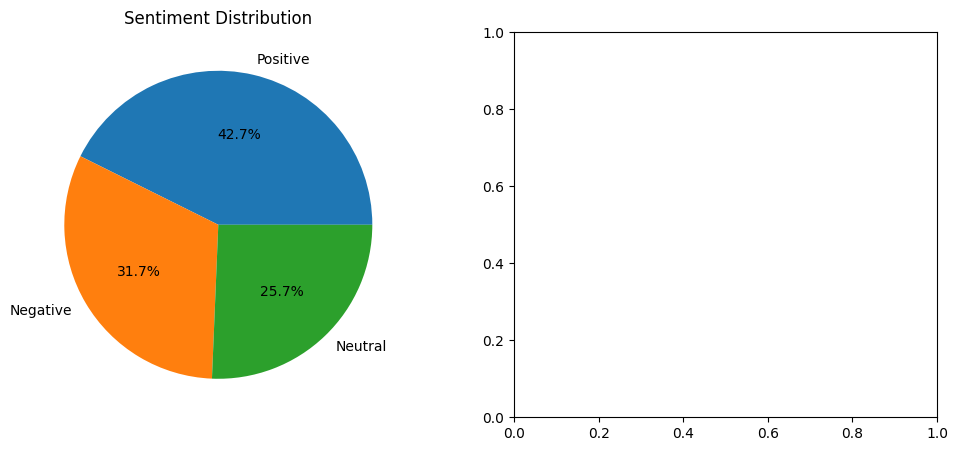

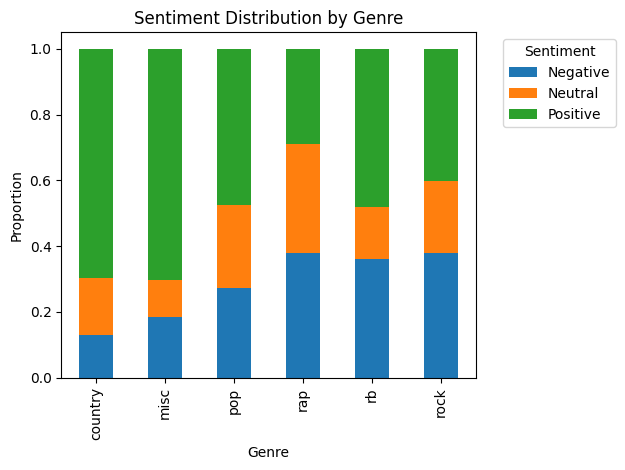

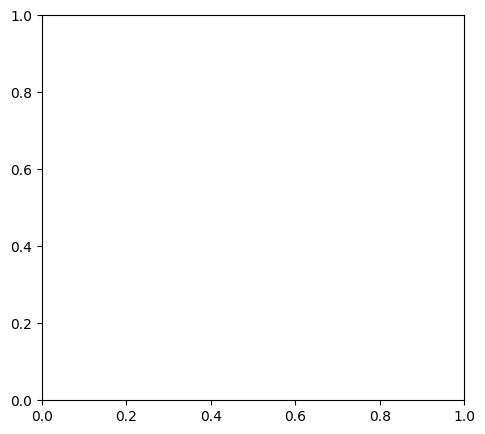

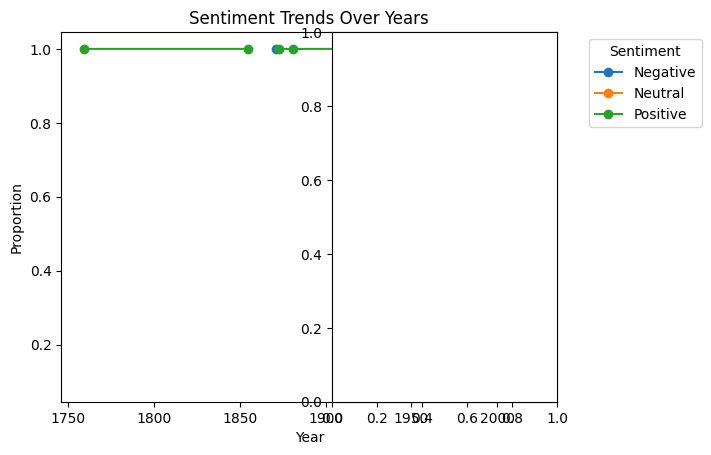

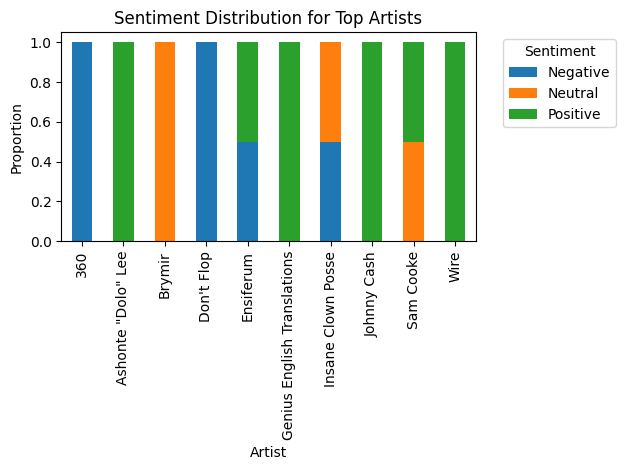

In [6]:
# Main Execution Function
def main(file_path):
    # Step 1: Load and Explore Dataset
    df_english = load_and_explore_dataset(file_path)
    
    if df_english is not None:
        # Step 2: Preprocess Lyrics
        processed_df = preprocess_lyrics_dataset(df_english)
        
        # Step 3: Perform Sentiment Analysis
        sentiment_results = processed_df['processed_lyrics'].apply(analyze_lyrics_sentiment)
        processed_df['sentiment'] = sentiment_results.apply(lambda x: x['sentiment'])
        processed_df['polarity'] = sentiment_results.apply(lambda x: x['polarity'])
        processed_df['subjectivity'] = sentiment_results.apply(lambda x: x['subjectivity'])
        
        # Step 4: Visualize Results
        visualize_sentiment_distribution(processed_df)
        analyze_sentiment_by_features(processed_df)
        
        # Optional: Save processed dataset
        processed_df.to_csv('processed_genius_lyrics_dataset.csv', index=False)
        
        return processed_df

# Usage
if __name__ == '__main__':
    # Replace with the actual path to your Genius Lyrics dataset
    file_path = '/home/deepak/dsciProject/new/song_lyrics.csv'
    processed_data = main(file_path)